# Image similarity search: Exercise Solution

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input

In [3]:
batch_size=90
img_size = 299
train_path = '../data/train/'

In [4]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
bottleneck_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    shuffle=False)

Found 90 images belonging to 3 classes.


In [5]:
images, labels  = bottleneck_generator.next()

In [6]:
base_model = Xception(include_top=False,
                      weights='imagenet',
                      input_shape=(img_size, img_size, 3),
                      pooling='avg')

In [7]:
bottlenecks = base_model.predict(images, verbose=1)

90/90 [==============================] - 293s 3s/step


In [8]:
from sklearn.neighbors import DistanceMetric

In [9]:
dist = DistanceMetric.get_metric('euclidean')

In [10]:
def imshow_scaled(img):
    plt.imshow((img + 1) / 2)

In [11]:
bn_dist = dist.pairwise(bottlenecks)

## Exercise

Define a function `image_search` that encapsulates the code above and retrieves and plot the top 8 images closest to a given image index:

```python
def image_search(img_index, n_rows=3, n_columns=3):
    ....your code here...
```

In [12]:
def image_search(img_index, n_rows=3, n_columns=3):
    n_images = n_rows * n_columns

    # create Pandas Series with distances from image
    dist_from_sel = pd.Series(bn_dist[img_index])
    
    # sort Series and get top n_images
    retrieved = dist_from_sel.sort_values().head(n_images)
    
    # create figure, loop over closest images indices 
    # and display them
    plt.figure(figsize=(10, 10))
    i = 1
    for idx in retrieved.index:
        plt.subplot(n_rows, n_columns, i)
        imshow_scaled(images[idx])
        if i == 1:
            plt.title('Selected image')
        else:
            plt.title("Dist: {:0.4f}".format(retrieved[idx]))
        i += 1
    plt.tight_layout()

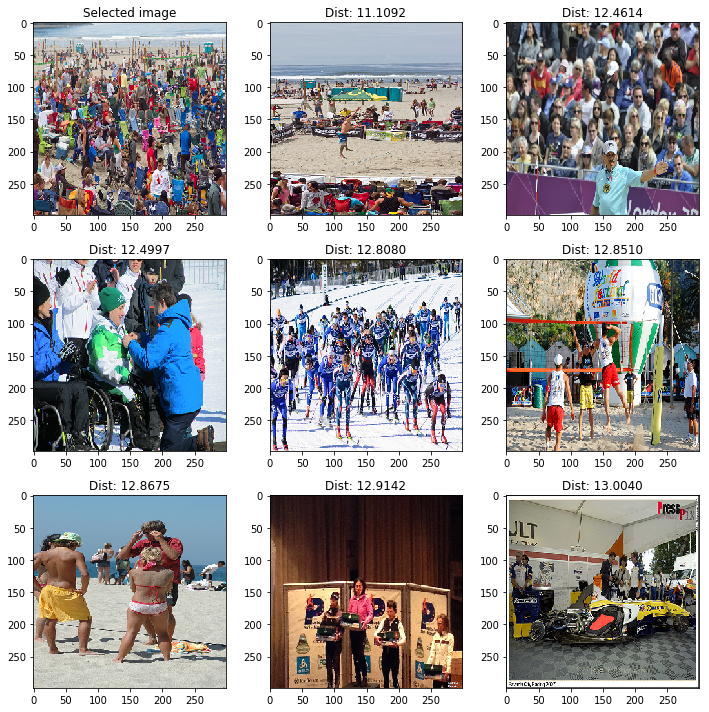

In [13]:
image_search(0)

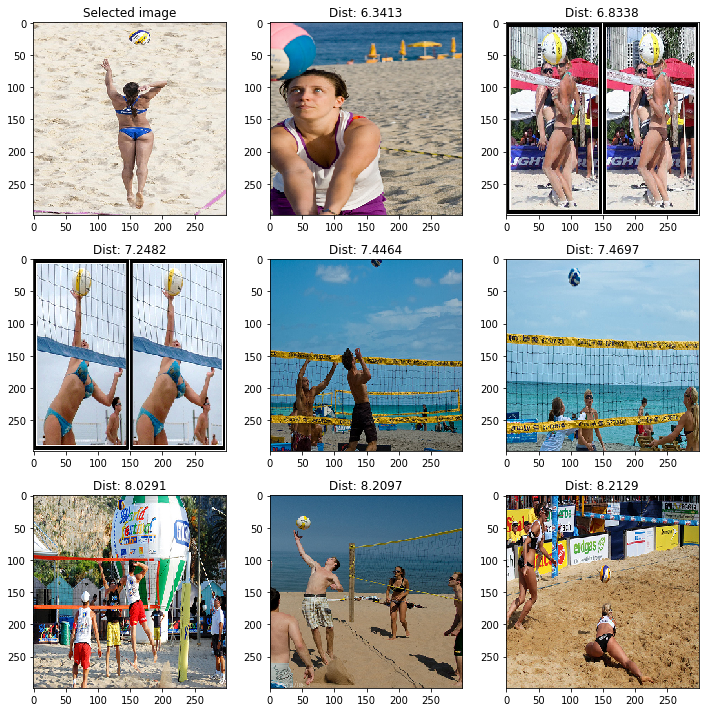

In [14]:
image_search(1)

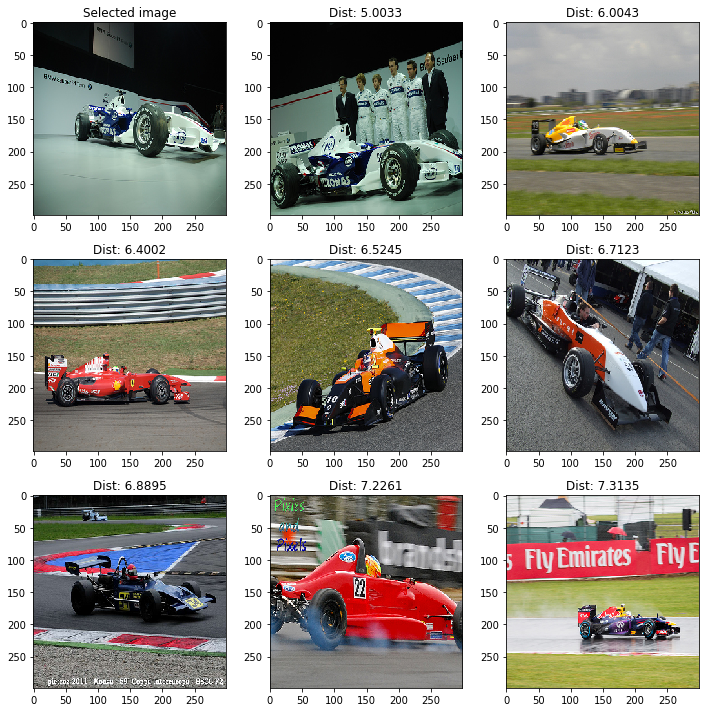

In [15]:
image_search(80)